In [1]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
rng = np.random.RandomState(42)

In [3]:
# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X+2, X-2]
X_train

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

In [4]:
# Generate some regular novel observations
X = 0.3 + rng.randn(20, 2)
X_test = np.r_[X+2, X-2]
X_test

array([[ 2.65778736,  2.86078453],
       [ 3.38305124,  3.35380205],
       [ 0.92233063,  1.36217496],
       [ 2.81503527,  2.81378595],
       [ 2.81504769,  6.15273149],
       [ 2.87089051,  3.43556564],
       [ 3.25400176,  2.95139125],
       [ 1.98473076,  3.05896922],
       [ 1.52717479,  2.06318139],
       [ 1.81463645,  2.38187414],
       [ 4.61465857,  0.43273481],
       [ 2.98626019,  0.68728413],
       [ 1.82806813,  3.3889506 ],
       [ 2.36428002,  1.22225522],
       [ 1.58469629,  2.97959775],
       [ 1.56963337,  2.51645859],
       [ 2.34557184,  1.64839965],
       [ 4.44394409,  2.93391902],
       [ 0.27485741,  2.48645431],
       [ 1.63821354,  3.15243333],
       [-1.34221264, -1.13921547],
       [-0.61694876, -0.64619795],
       [-3.07766937, -2.63782504],
       [-1.18496473, -1.18621405],
       [-1.18495231,  2.15273149],
       [-1.12910949, -0.56443436],
       [-0.74599824, -1.04860875],
       [-2.01526924, -0.94103078],
       [-2.47282521,

In [5]:
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X_outliers

array([[-0.48822863, -3.37234895],
       [-3.79719405,  3.70118732],
       [ 2.68784096,  1.56779365],
       [-0.72837644, -2.61364544],
       [-2.74850366, -1.99805681],
       [ 0.39381332,  1.71676738],
       [ 1.28157901, -1.76052882],
       [ 3.63892225,  1.90317533],
       [ 0.43483242,  0.89376597],
       [-0.6431995 , -2.01815208],
       [-1.15221857,  2.06276888],
       [-3.88485209, -3.07141888],
       [-3.63197886, -3.67416958],
       [ 2.84368467,  1.62926288],
       [-0.20660937, -3.21732671],
       [-0.067073  , -0.21222583],
       [-2.61438504, -0.52918681],
       [-0.81196212,  0.92680078],
       [ 1.08074921, -3.63756792],
       [-1.00309908,  1.00687933]])

In [6]:
# Fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

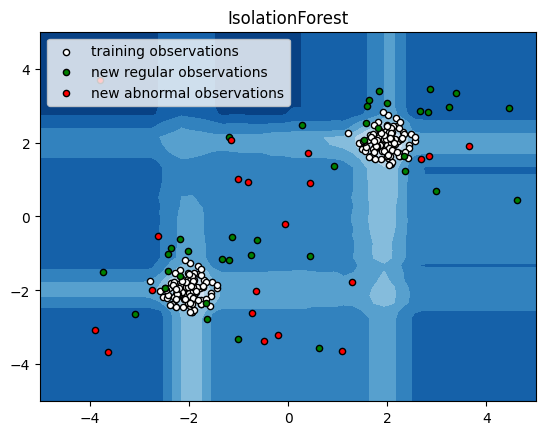

In [7]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left",
)
plt.show()